# Digit Recognition

## Random Forest Classifier

### importing data


In [27]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt


digits = datasets.load_digits()

### Preparing data

In [28]:
images = digits.images
labels = digits.target

n_samples = len(images)
images = images.reshape((n_samples, -1))


n_train = n_samples//2
n_test = n_samples - n_train

### Splitting Data into Train and Test

In [29]:
X_train = images[:n_train]
X_test = images[n_train:]

Y_train = labels[:n_train]
Y_test = labels[n_train:]

### Creating the model

In [30]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, Y_train)

RandomForestClassifier()

## Printing the model

[Text(491.1543060200669, 574.9615384615385, 'X[30] <= 1.5\ngini = 0.899\nsamples = 579\nvalue = [92, 100, 95, 97, 93, 90, 85, 93, 75, 78]'),
 Text(226.11596989966554, 528.9646153846154, 'X[28] <= 5.5\ngini = 0.873\nsamples = 384\nvalue = [3, 90, 94, 97, 53, 71, 84, 20, 67, 30]'),
 Text(64.19799331103678, 482.96769230769235, 'X[2] <= 7.5\ngini = 0.607\nsamples = 73\nvalue = [3, 0, 4, 1, 6, 29, 66, 4, 3, 0]'),
 Text(32.84548494983277, 436.97076923076924, 'X[53] <= 1.5\ngini = 0.358\nsamples = 54\nvalue = [2, 0, 1, 0, 6, 1, 66, 4, 3, 0]'),
 Text(11.9438127090301, 390.9738461538462, 'X[51] <= 9.5\ngini = 0.642\nsamples = 5\nvalue = [0, 0, 0, 0, 3, 0, 0, 4, 2, 0]'),
 Text(5.97190635451505, 344.9769230769231, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 4, 0, 0]'),
 Text(17.91571906354515, 344.9769230769231, 'X[27] <= 10.0\ngini = 0.48\nsamples = 3\nvalue = [0, 0, 0, 0, 3, 0, 0, 0, 2, 0]'),
 Text(11.9438127090301, 298.98, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 3, 0, 0, 0, 

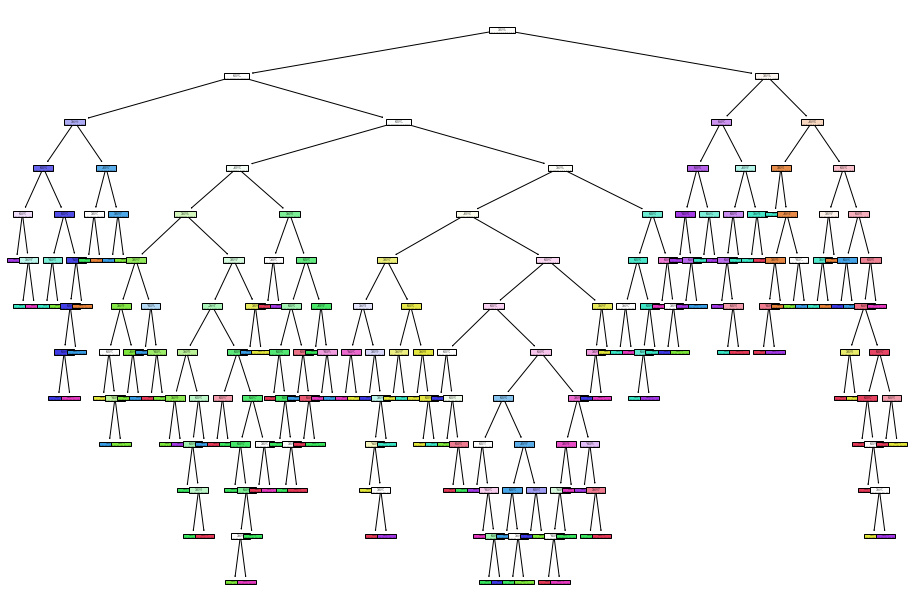

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.tree import export_graphviz

plt.figure(figsize=(16,11))
plot_tree(RF_model.estimators_[2],filled= True)



In [32]:
print(export_text(RF_model.estimators_[1],show_weights=True))

|--- feature_33 <= 2.50
|   |--- feature_53 <= 0.50
|   |   |--- feature_37 <= 7.50
|   |   |   |--- feature_10 <= 15.50
|   |   |   |   |--- feature_19 <= 9.50
|   |   |   |   |   |--- feature_35 <= 6.50
|   |   |   |   |   |   |--- feature_12 <= 8.00
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 4.00] class: 9.0
|   |   |   |   |   |   |--- feature_12 >  8.00
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.00, 0.00, 0.00] class: 7.0
|   |   |   |   |   |--- feature_35 >  6.50
|   |   |   |   |   |   |--- feature_29 <= 5.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00] class: 5.0
|   |   |   |   |   |   |--- feature_29 >  5.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 6.00, 0.00, 0.00] class: 7.0
|   |   |   |   |--- feature_19 >  9.50
|   |   |   |   |   |--- feature_12 <= 14.00
|   |   |   |   | 

### Evalution

In [37]:
Y_predicted = RF_model.predict(X_test)
print("The accuracy of the Gaussian Naive Bayes algorithm is : ")
print(RF_model.score(X_test,Y_test))



The accuracy of the Gaussian Naive Bayes algorithm is : 
0.9332591768631813


In [36]:
print(classification_report(Y_test, Y_predicted ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.95      0.88      0.91        91
           2       0.99      0.91      0.95        86
           3       0.89      0.86      0.87        91
           4       0.99      0.96      0.97        92
           5       0.90      0.96      0.93        91
           6       0.99      1.00      0.99        91
           7       0.96      0.98      0.97        89
           8       0.90      0.89      0.89        88
           9       0.82      0.92      0.87        92

    accuracy                           0.93       899
   macro avg       0.94      0.93      0.93       899
weighted avg       0.94      0.93      0.93       899



#### Confusion Matrix

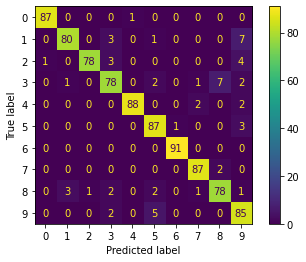

In [35]:


confusion_matrix(Y_test, Y_predicted)

confusion_matrix = confusion_matrix(Y_test, Y_predicted)
#plt.figure(figsize=(3, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

disp.plot()
plt.show()


